In [39]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.common import NoSuchElementException
from matplotlib import style
import re
from datetime import datetime
%matplotlib inline

In [40]:
driver=webdriver.Chrome()
url='https://esf.fang.com/chengjiao-a01-b05510/'
driver.get(url)

In [41]:
i=0
j=1
df = pd.DataFrame(columns = ['Name' , 'area', 'loc' ,'time', 'price','unit_price'])
indexsize = df.index.size

while i==0:
    for j in range(1,31):
        str=f'D0{j}'
        House=driver.find_element('id',str).text
        House=re.split(r'[\n\s]',House)
        del House[4]
        df.loc[indexsize] =House
        df.index = df.index + 1 
        j=j+1
    try:
        next_page=driver.find_element('partial link text','下一页')
        next_page.click()
        j=1
    except NoSuchElementException:
        break
    #sleep(3)


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="D05"]"}
  (Session info: chrome=111.0.5563.111)
Stacktrace:
Backtrace:
	(No symbol) [0x008DDCE3]
	(No symbol) [0x008739D1]
	(No symbol) [0x00784DA8]
	(No symbol) [0x007B019F]
	(No symbol) [0x007B03AB]
	(No symbol) [0x007DEE62]
	(No symbol) [0x007CAF14]
	(No symbol) [0x007DD57C]
	(No symbol) [0x007CACC6]
	(No symbol) [0x007A6F68]
	(No symbol) [0x007A80CD]
	GetHandleVerifier [0x00B53832+2506274]
	GetHandleVerifier [0x00B89794+2727300]
	GetHandleVerifier [0x00B8E36C+2746716]
	GetHandleVerifier [0x00986690+617600]
	(No symbol) [0x0087C712]
	(No symbol) [0x00881FF8]
	(No symbol) [0x008820DB]
	(No symbol) [0x0088C63B]
	BaseThreadInitThunk [0x75B800F9+25]
	RtlGetAppContainerNamedObjectPath [0x77487BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77487B8E+238]


In [42]:
df.head(5)

,Name,area,loc,time,price,unit_price
484,新城国际公寓,131.35平米,朝阳-CBD,2020-11-25,1396万,106585元/㎡
483,新城国际公寓,171.42平米,朝阳-CBD,2020-11-25,1750万,102380元/㎡
482,新城国际公寓,190.94平米,朝阳-CBD,2020-11-21,2060万,107887元/㎡
481,世界城,369.34平米,朝阳-CBD,2020-11-21,3461万,93816元/㎡
480,新城国际公寓,131.15平米,朝阳-CBD,2020-11-19,1398万,106748元/㎡


In [43]:
df['area'] = df['area'].apply(lambda x:x[:-2])
df['area']=df['area'].astype(float)
df.head(5)

,Name,area,loc,time,price,unit_price
484,新城国际公寓,131.35,朝阳-CBD,2020-11-25,1396万,106585元/㎡
483,新城国际公寓,171.42,朝阳-CBD,2020-11-25,1750万,102380元/㎡
482,新城国际公寓,190.94,朝阳-CBD,2020-11-21,2060万,107887元/㎡
481,世界城,369.34,朝阳-CBD,2020-11-21,3461万,93816元/㎡
480,新城国际公寓,131.15,朝阳-CBD,2020-11-19,1398万,106748元/㎡


In [44]:
df['price'] = df['price'].apply(lambda x:x[:-1])
df['price']=df['price'].astype(float)
df.head(5)

,Name,area,loc,time,price,unit_price
484,新城国际公寓,131.35,朝阳-CBD,2020-11-25,1396.0,106585元/㎡
483,新城国际公寓,171.42,朝阳-CBD,2020-11-25,1750.0,102380元/㎡
482,新城国际公寓,190.94,朝阳-CBD,2020-11-21,2060.0,107887元/㎡
481,世界城,369.34,朝阳-CBD,2020-11-21,3461.0,93816元/㎡
480,新城国际公寓,131.15,朝阳-CBD,2020-11-19,1398.0,106748元/㎡


In [45]:
df['unit_price'] = df['unit_price'].apply(lambda x:x[:-3])
df['unit_price']=df['unit_price'].astype(float)
df.head(5)

,Name,area,loc,time,price,unit_price
484,新城国际公寓,131.35,朝阳-CBD,2020-11-25,1396.0,106585.0
483,新城国际公寓,171.42,朝阳-CBD,2020-11-25,1750.0,102380.0
482,新城国际公寓,190.94,朝阳-CBD,2020-11-21,2060.0,107887.0
481,世界城,369.34,朝阳-CBD,2020-11-21,3461.0,93816.0
480,新城国际公寓,131.15,朝阳-CBD,2020-11-19,1398.0,106748.0


In [46]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')
df.head(5)

,Name,area,loc,time,price,unit_price
484,新城国际公寓,131.35,朝阳-CBD,2020-11-25,1396.0,106585.0
483,新城国际公寓,171.42,朝阳-CBD,2020-11-25,1750.0,102380.0
482,新城国际公寓,190.94,朝阳-CBD,2020-11-21,2060.0,107887.0
481,世界城,369.34,朝阳-CBD,2020-11-21,3461.0,93816.0
480,新城国际公寓,131.15,朝阳-CBD,2020-11-19,1398.0,106748.0


In [51]:
df=df.reset_index()
df.drop(columns='index',inplace=True)
df.drop(columns='level_0',inplace=True)
df.head(5)

,level_0,index,Name,area,loc,time,price,unit_price
0,0,484,新城国际公寓,131.35,朝阳-CBD,2020-11-25,1396.0,106585.0
1,1,483,新城国际公寓,171.42,朝阳-CBD,2020-11-25,1750.0,102380.0
2,2,482,新城国际公寓,190.94,朝阳-CBD,2020-11-21,2060.0,107887.0
3,3,481,世界城,369.34,朝阳-CBD,2020-11-21,3461.0,93816.0
4,4,480,新城国际公寓,131.15,朝阳-CBD,2020-11-19,1398.0,106748.0


In [62]:
df['year']=[i.year for i in df['time']] # 提取每个'到期时间'的年
df['month']=[i.month for i in df['time']]# 提取每个'到期时间'的月df['time'].year
df.head(5)


pandas.core.series.Series

<AxesSubplot:xlabel='year,month'>

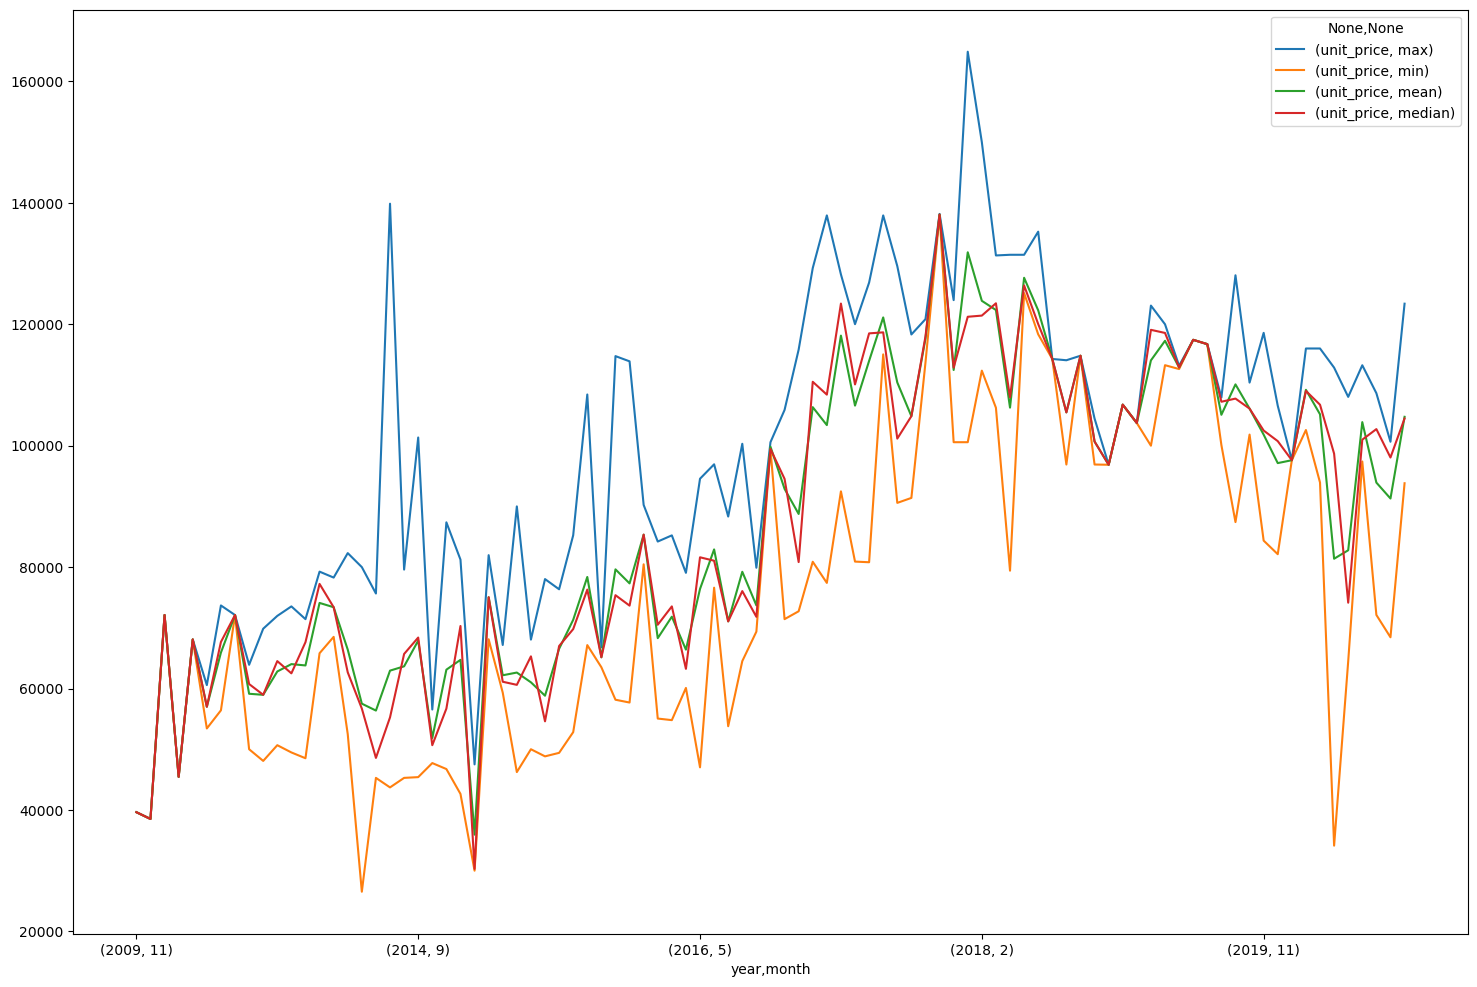

In [90]:
data=df[['unit_price','year','month']]
df_max = data.groupby([data['year'],data['month']]).agg(['max','min','mean','median'])
df_max.plot(figsize=(18,12))

In [29]:
for var in ['area','price','unit_price']:
    display(df[var].describe())

count    484.000000
mean     183.942665
std       82.087498
min       33.000000
25%      133.940000
50%      180.000000
75%      223.000000
max      572.000000
Name: area, dtype: float64

count     484.000000
mean     1608.235537
std      1002.143092
min       209.000000
25%       980.000000
50%      1380.000000
75%      2051.500000
max      7999.000000
Name: price, dtype: float64

count       484.000000
mean      85473.088843
std       26005.949444
min       26531.000000
25%       65633.500000
50%       80602.500000
75%      107930.250000
max      164894.000000
Name: unit_price, dtype: float64

In [13]:
df.to_excel("output.xlsx")

D01
<class 'str'>
D02
<class 'str'>
D03
<class 'str'>
D04
<class 'str'>
D05
<class 'str'>
D06
<class 'str'>
D07
<class 'str'>
D08
<class 'str'>
D09
<class 'str'>
